In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

1) cursor

In [6]:
hallway1 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/hallway1.jpg')
hallway2 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/hallway2.jpg')
hallway3 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/hallway3.jpg')

In [14]:
hallway1 = cv2.cvtColor(hallway1, cv2.COLOR_RGB2BGR)
hallway2 = cv2.cvtColor(hallway2, cv2.COLOR_RGB2BGR)
hallway3 = cv2.cvtColor(hallway3, cv2.COLOR_RGB2BGR)

In [15]:
hallway1_right_wall = [[849, 228], [1001, 79], [1099, 230], [840, 661]]
hallway2_right_wall = [[705, 549], [846, 389], [952, 537], [721, 982]]
hallway3_right_wall = [[822, 428], [901, 266], [967, 416], [829, 853]]
hallway1_floor = [[571, 554], [657, 544], [722, 546], [840, 658]]
hallway3_floor = [[599, 755], [687, 740], [755, 745], [817, 836]]

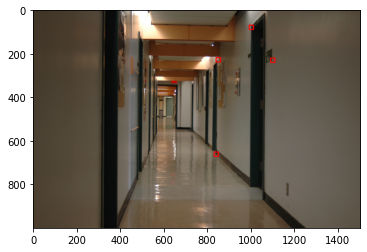

In [29]:
hallway1_cpy = hallway1.copy()
for coordinates in hallway1_right_wall:
  x, y = coordinates
  cv2.rectangle(hallway1_cpy, (x - 10, y - 10), (x + 10, y + 10), (255 ,0, 0), 3)
plt.imshow(hallway1_cpy, cmap="gray")

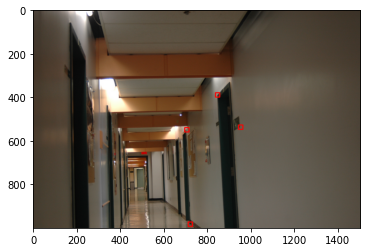

In [71]:
hallway2_cpy = hallway2.copy()
for coordinates in hallway2_right_wall:
  x, y = coordinates
  cv2.rectangle(hallway2_cpy, (x - 10, y - 10), (x + 10, y + 10), (255 ,0, 0), 3)
plt.imshow(hallway2_cpy, cmap="gray")

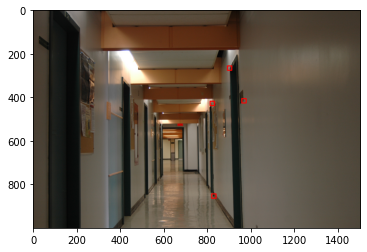

In [79]:
hallway3_cpy = hallway3.copy()
for coordinates in hallway3_right_wall:
  x, y = coordinates
  cv2.rectangle(hallway3_cpy, (x - 10, y - 10), (x + 10, y + 10), (255 ,0, 0), 3)
plt.imshow(hallway3_cpy, cmap="gray")

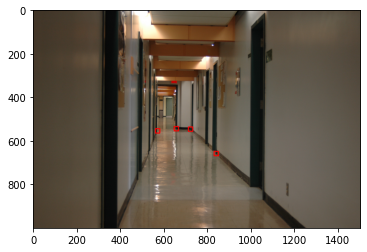

In [78]:
hallway1_cpy = hallway1.copy()
for coordinates in hallway1_floor:
  x, y = coordinates
  cv2.rectangle(hallway1_cpy, (x - 10, y - 10), (x + 10, y + 10), (255 ,0, 0), 3)
plt.imshow(hallway1_cpy, cmap="gray")

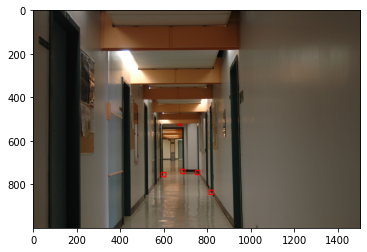

In [80]:
hallway3_cpy = hallway3.copy()
for coordinates in hallway3_floor:
  x, y = coordinates
  cv2.rectangle(hallway3_cpy, (x - 10, y - 10), (x + 10, y + 10), (255 ,0, 0), 3)
plt.imshow(hallway3_cpy, cmap="gray")

2) Fit homography H

In [7]:
def homography(source_pts, result_pts):
    n = len(source_pts)
    A = np.zeros((2 * n, 9))
    for i in range(n):
      x1, y1 = source_pts[i][0], source_pts[i][1]
      x2, y2 = result_pts[i][0], result_pts[i][1]
      A[2*i] = [x1, y1, 1, 0, 0, 0, -x2 * x1, -x2 * y1, -x2]
      A[2*i+1] = [0, 0, 0, x1, y1, 1, -y2 * x1, -y2 * y1, -y2]

    u, s, v = np.linalg.svd(A)
    smallest_eigen_idx = np.argmin(s)
    h = v[smallest_eigen_idx, :]
    H = h.reshape((3,3))
    H = h.reshape(3, 3)
    return H

In [113]:
print(homography(hallway1_right_wall, hallway2_right_wall))

[[ 8.97920235e-01  6.55471565e-02 -1.00985648e+02]
 [-8.16540550e-02  9.73161087e-01  3.74089050e+02]
 [-5.19306652e-05  1.47830228e-05  1.00000000e+00]]


3) map result (x,y). to source (x,y)

In [8]:
def map_func(result_pts, H):
  mapped_source_pts = []
  for coordinates in result_pts:
    result_pt = (coordinates[0], coordinates[1], 1)
    mapped_s_pt = H @ result_pt
    mapped_s_pt[0] =  mapped_s_pt[0] / mapped_s_pt[2]
    mapped_s_pt[1] =  mapped_s_pt[1] / mapped_s_pt[2]
    mapped_source_pts.append(mapped_s_pt[:2])
  return mapped_source_pts

def map_back(result_pts, H):
  mapped_source_pts = []
  for coordinates in result_pts:
    result_pt = (coordinates[0], coordinates[1], 1)
    mapped_s_pt = np.linalg.inv(H) @ result_pt
    mapped_s_pt[0] =  mapped_s_pt[0] / mapped_s_pt[2]
    mapped_s_pt[1] =  mapped_s_pt[1] / mapped_s_pt[2]
    mapped_source_pts.append(mapped_s_pt[:2])
  return mapped_source_pts

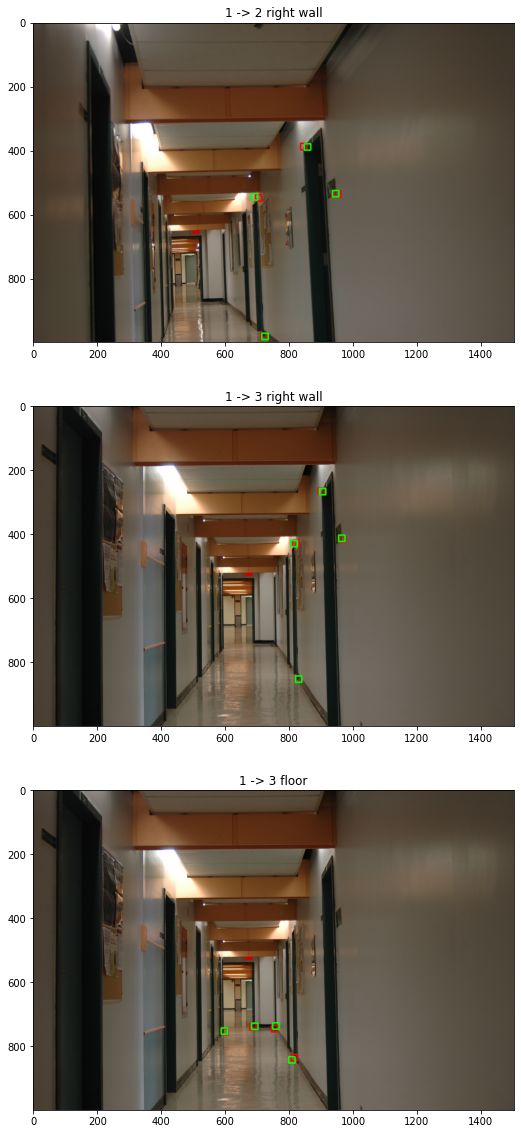

In [135]:
# 1 -> 2 right wall
H = homography(hallway1_right_wall, hallway2_right_wall)
mapped_source_pts = map_func(hallway1_right_wall, H)
hallway2_cpy = hallway2.copy()
for coordinates in hallway2_right_wall:
  x, y = coordinates
  cv2.rectangle(hallway2_cpy, (x - 10, y - 10), (x + 10, y + 10), (255, 0, 0), 3)
for coordinates in mapped_source_pts:
  x, y = coordinates
  x, y = int(x), int(y)
  cv2.rectangle(hallway2_cpy, (x - 10, y - 10), (x + 10, y + 10), (0, 255, 0), 3)
fig, axs = plt.subplots(3, figsize=(15, 20))
axs[0].set_title('1 -> 2 right wall')
axs[0].imshow(hallway2_cpy, cmap="gray")

# 1 -> 3 right wall
H = homography(hallway1_right_wall, hallway3_right_wall)
mapped_source_pts = map_func(hallway1_right_wall, H)
hallway3_cpy = hallway3.copy()
for coordinates in hallway3_right_wall:
  x, y = coordinates
  cv2.rectangle(hallway3_cpy, (x - 10, y - 10), (x + 10, y + 10), (255, 0, 0), 3)
for coordinates in mapped_source_pts:
  x, y = coordinates
  x, y = int(x), int(y)
  cv2.rectangle(hallway3_cpy, (x - 10, y - 10), (x + 10, y + 10), (0, 255, 0), 3)
axs[1].set_title('1 -> 3 right wall')
axs[1].imshow(hallway3_cpy, cmap="gray")

# 1 -> 3 floor
H = homography(hallway1_floor, hallway3_floor)
mapped_source_pts = map_func(hallway1_floor, H)
hallway3_cpy = hallway3.copy()
for coordinates in hallway3_floor:
  x, y = coordinates
  cv2.rectangle(hallway3_cpy, (x - 10, y - 10), (x + 10, y + 10), (255, 0, 0), 3)
for coordinates in mapped_source_pts:
  x, y = coordinates
  x, y = int(x), int(y)
  cv2.rectangle(hallway3_cpy, (x - 10, y - 10), (x + 10, y + 10), (0, 255, 0), 3)
axs[2].set_title('1 -> 3 floor')
axs[2].imshow(hallway3_cpy, cmap="gray")

4) show a new image

In [9]:
def plot_new(image1, image2, homography, padding=500):
  H, W = image1.shape[0], image1.shape[1]
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
  #padding
  new_image = np.zeros((H + 2 * padding, W + 2 * padding, 3))
  new_image[padding:padding + H, padding:padding + W, 0] = image1
  for y in range(image2.shape[0]):
      for x in range(image2.shape[1]):
          t = np.array([np.append([x, y], [1])]).transpose()
          src_pt = np.matmul(np.linalg.inv(homography), t)
          x0, y0 = int(src_pt[0]/src_pt[2]), int(src_pt[1]/src_pt[2])
          if x0 >= padding and x0 < padding + image2.shape[1] \
              and y0 >= padding and y0 < padding + image2.shape[0]:
              new_image[y , x , 1] = image2[y0 - padding, x0 - padding]
              new_image[y, x , 2] = image2[y0 - padding, x0 - padding]

  new_image /= 255
  plt.imshow(new_image)

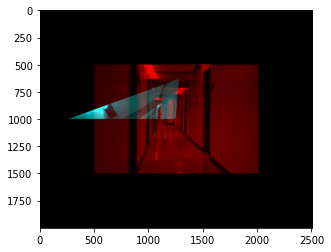

In [133]:
# 1 -> 2 right wall
H = homography(hallway1_right_wall, hallway2_right_wall)
plot_new(hallway1, hallway2, H)

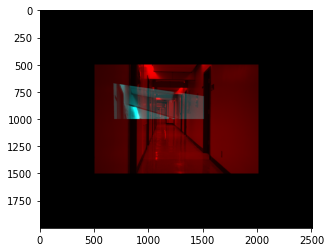

In [125]:
# 1 -> 3 right wall
H = homography(hallway1_right_wall, hallway3_right_wall)
plot_new(hallway1, hallway3, H)

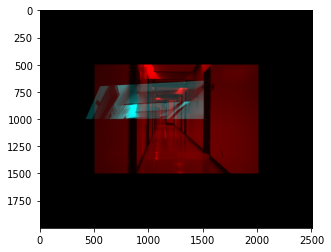

In [134]:
# 1 -> 3 floor
H = homography(hallway1_floor, hallway3_floor)
plot_new(hallway1, hallway3, H)

In [12]:
# switch case
def run_case(case_num='A'):
  hallway1 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/hallway1.jpg')
  hallway2 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/hallway2.jpg')
  hallway3 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/hallway3.jpg')
  hallway1 = cv2.cvtColor(hallway1, cv2.COLOR_RGB2BGR)
  hallway2 = cv2.cvtColor(hallway2, cv2.COLOR_RGB2BGR)
  hallway3 = cv2.cvtColor(hallway3, cv2.COLOR_RGB2BGR)
  hallway1_right_wall = [[849, 228], [1001, 79], [1099, 230], [840, 661]]
  hallway2_right_wall = [[705, 549], [846, 389], [952, 537], [721, 982]]
  hallway3_right_wall = [[822, 428], [901, 266], [967, 416], [829, 853]]
  hallway1_floor = [[571, 554], [657, 544], [722, 546], [840, 658]]
  hallway3_floor = [[599, 755], [687, 740], [755, 745], [817, 836]]
  if case_num == 'A':
    H = homography(hallway1_right_wall, hallway2_right_wall)
    mapped_source_pts = map_func(hallway1_right_wall, H)
    hallway2_cpy = hallway2.copy()
    for coordinates in hallway2_right_wall:
      x, y = coordinates
      cv2.rectangle(hallway2_cpy, (x - 10, y - 10), (x + 10, y + 10), (255, 0, 0), 3)
    for coordinates in mapped_source_pts:
      x, y = coordinates
      x, y = int(x), int(y)
      cv2.rectangle(hallway2_cpy, (x - 10, y - 10), (x + 10, y + 10), (0, 255, 0), 3)
    plt.imshow(hallway2_cpy, cmap="gray")

  elif case_num == 'B':
    H = homography(hallway1_right_wall, hallway3_right_wall)
    mapped_source_pts = map_func(hallway1_right_wall, H)
    hallway3_cpy = hallway3.copy()
    for coordinates in hallway3_right_wall:
      x, y = coordinates
      cv2.rectangle(hallway3_cpy, (x - 10, y - 10), (x + 10, y + 10), (255, 0, 0), 3)
    for coordinates in mapped_source_pts:
      x, y = coordinates
      x, y = int(x), int(y)
      cv2.rectangle(hallway3_cpy, (x - 10, y - 10), (x + 10, y + 10), (0, 255, 0), 3)
    plt.imshow(hallway3_cpy, cmap="gray")

  elif case_num == 'C':
    H = homography(hallway1_floor, hallway3_floor)
    mapped_source_pts = map_func(hallway1_floor, H)
    hallway3_cpy = hallway3.copy()
    for coordinates in hallway3_floor:
      x, y = coordinates
      cv2.rectangle(hallway3_cpy, (x - 10, y - 10), (x + 10, y + 10), (255, 0, 0), 3)
    for coordinates in mapped_source_pts:
      x, y = coordinates
      x, y = int(x), int(y)
      cv2.rectangle(hallway3_cpy, (x - 10, y - 10), (x + 10, y + 10), (0, 255, 0), 3)
    plt.imshow(hallway3_cpy, cmap="gray")





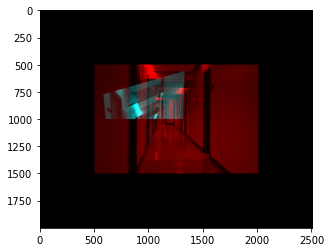

In [13]:
run_case("B")